In [4]:
import pandas as pd
import jieba

In [5]:
df= pd.read_csv("dior.csv")

In [6]:
df['contents']

0      【女生买了一支#278块的口红男友嫌贵#，骂太败家了…】近日网上一姑娘投稿称，自己花费278...
1                            点赞就行\n揪一个粉丝送Dior 740一支，明天开！
2      蔡徐坤 x Dior Homme ┊ 从美国归来的机场look，对一个新人来说非常用心了：大...
3      去年夏天的尾巴种草了Dior喷雾粉底，想着夏天都结束了，而且家里底妆那么多，来年再买吧，就这...
4                              跟风买的Dior 999，一点也不适合自己 不开心
5      超模#卡莉·克劳斯#过去为Dior拍摄的广告大片，性感的红唇，夸张性感的卷发，满满复古画报女...
6      Today I feel super super super happy.\nI reall...
7      凌晨睡不着爬起来看 迟了好几个月的show 看见这条Dior 走秀款黑裙瞬间满血复活 好喜欢...
8      Roger Vivier for Dior, photographed by Paul Sc...
9      没人知道你的口红\n是Chanel,Dior\nYSL还是Tom Ford\n没人看清你腰上...
10     人生不相见，动如参与商。明日隔山岳，世事两茫茫。热爱生活的人，生活也爱他。《dior戴妃包》...
11                                   Dior护甲油功课#功课##Dior#
12     天气原因\ndior999 除了雾面版这个版膏体爱挂水珠\n其余滋润版 夹心版 金属版等等版...
13                                            Dior740 好看
14     涂了这支口红四小时以上随便喝水之后 照了一眼我的小镜子，突然觉得hin美呀！！！🙈🙈\n🎀嗯...
15     写论文的时候只有买买买才能给生活带点甜\nTF的眼影每次买回来都用的很少 我可能真的只是想拥...
16     刚才突然闻到一阵Dior花漾甜心的味道，我还在想我室友为啥半夜喷香水，仔细一闻是花露水，惊了...
17                      House o

In [7]:
words=[]
for content in df['contents']:
    m=list(jieba.cut(content))
    words.extend(m)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/wl/5125h54j1b5_9l3s63fcykx40000gn/T/jieba.cache
Loading model cost 0.756 seconds.
Prefix dict has been built succesfully.


In [8]:
words_count ={}
for word in words:
    if word not in words_count:
        words_count[word] = 1
    else:
        words_count[word] = words_count[word]+1

In [ ]:
words_count

In [10]:
pd.Series(words_count).sort_values(ascending=False)

        1907
的       1566
\n      1110
，       1014
#        555
了        530
Dior     438
是        408
我        406
。        359
！        262
…        180
都        179
拍        165
-        163
视频       149
买        139
在        138
秒        138
dior     134
你        131
不        128
、        124
？        117
和        114
真的       112
也        111
好        109
啊        108
@        103
        ... 
恨          1
恒久         1
总结         1
想想         1
想来         1
成长         1
愣          1
非主流        1
成绩         1
成员         1
成功者        1
非常适合       1
戏精         1
懂          1
慎入         1
愿意         1
愤怒         1
感慨         1
想见         1
感人         1
愛是         1
愚公移山       1
愚公         1
意思         1
意境         1
意义         1
惹          1
想领         1
想起         1
🧥          1
Length: 4987, dtype: int64

In [ ]:
df_words_count = pd.Series(words_count).to_frame().reset_index()
df_words_count

In [12]:
stop_words = set(['的','#','。',' ','\n','了','我', '，','！','##','是','、','在','和','不','@','“','“',
    'the',
    'of',
    'to',
    'a',
    'is',
])
def is_not_stop_word(x):
    return x not in stop_words
words=df_words_count[
    df_words_count['index'].apply(is_not_stop_word)
].sort_values(by=0, ascending=False)

In [ ]:
# word_final=words.set_index('index')['0'].to_dict()
words

In [14]:
from PIL import Image
from wordcloud import WordCloud
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

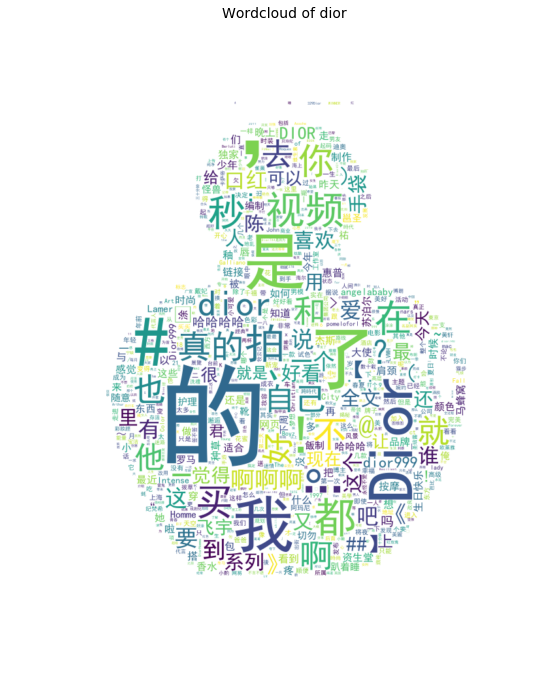

In [19]:
import numpy as np
chanel_mask = np.array(Image.open('3.jpg'))
font = r'simhei.ttf'
wc = WordCloud(background_color="white",font_path=font,max_words=2000, mask=chanel_mask)
wc.generate_from_frequencies(words_count)
# wc.generate(word_count)

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud of dior', loc='Center', fontsize=14)
plt.show()